### 1. 아래 빈칸을 채워 입력 행렬과, 필터 행렬의 합성곱을 구하는 함수를 완성해 주세요. (20점)

In [3]:
import numpy as np

def convolution(input_matrix, filter_matrix):
    # 입력 행렬과 필터 행렬의 크기를 확인
    input_rows, input_cols = input_matrix.shape
    filter_rows, filter_cols = filter_matrix.shape

    # 필터가 입력 행렬보다 작아야 연산 가능
    if filter_rows > input_rows or filter_cols > input_cols:
        raise ValueError()

    # convolution 결과를 저장할 빈 행렬 생성 stride와 padding은 없다고 가정
    result_matrix = np.zeros((input_rows - filter_rows + 1, input_cols - filter_cols + 1))

    # convolution 연산 수행
    for i in range(result_matrix.shape[0]):
        for j in range(result_matrix.shape[1]):
            result_matrix[i, j] = np.sum(input_matrix[i:i+filter_rows, j:j+filter_cols] * filter_matrix)

    return result_matrix

# 예시를 위해 간단한 행렬 생성
input_matrix = np.array(
[[ 2, 4, -6, 6,  7],
 [-5, 3, -2,  3,  4],
 [ 2, -1,  4,  7, -6],
 [ 4, 10,  1, -2,  2],
 [-9,  1, -3,  6, -4]]) # 5X5 행렬로 원하는 값을 넣어주세요

filter_matrix = np.array([[2, 4, 4],
 [6, 5, 5],
 [5, 2, 1]]) # 3X3 행렬로 원하는 값을 넣어주세요

# convolution 연산 수행
result = convolution(input_matrix, filter_matrix)

print("입력 행렬:")
print(input_matrix)

print("\n필터 행렬:")
print(filter_matrix)

print("\nConvolution 결과:")
print(result)


입력 행렬:
[[ 2  4 -6  6  7]
 [-5  3 -2  3  4]
 [ 2 -1  4  7 -6]
 [ 4 10  1 -2  2]
 [-9  1 -3  6 -4]]

필터 행렬:
[[2 4 4]
 [6 5 5]
 [5 2 1]]

Convolution 결과:
[[-17.  41.  91.]
 [ 62. 109.  56.]
 [ 49. 102.  11.]]


### 2. ReLU함수를 만들어 위의 result에 적용해 주세요(5점)

In [4]:
def relu_activation(matrix):
    return np.maximum(0,matrix)
result_relu = relu_activation(result)

print(result_relu)

[[  0.  41.  91.]
 [ 62. 109.  56.]
 [ 49. 102.  11.]]


### 3-1. input size가 256, filter size가 4, stride가 3, padding이 2일때 feature map의 크기를 말해주세요 (5점)

답 86x86

### 3-2. 다음 RGB 커널을 적용했을 때, 노란색 부분에 들어갈 수를 구하시오 (7점).

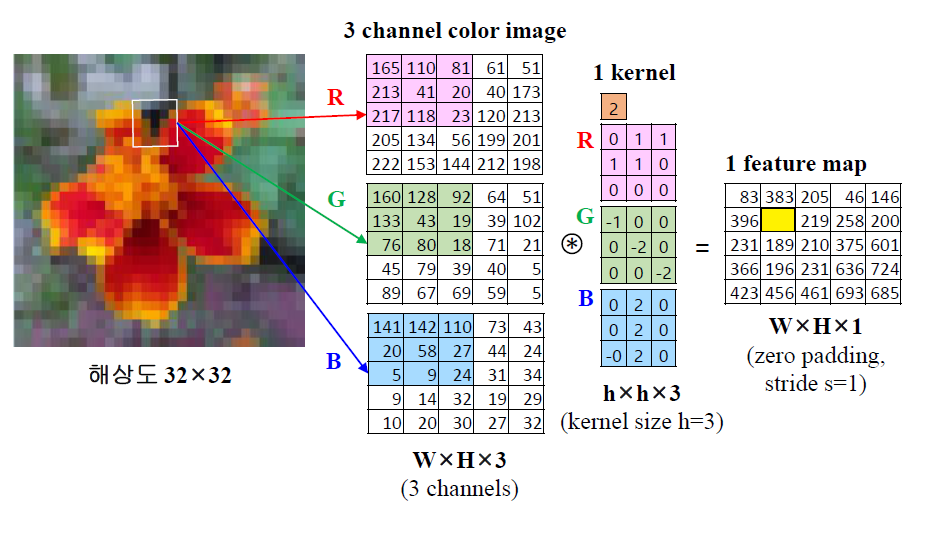

답) 

### 3-3. CNN에서 Padding을 적용하는 이유를 설명하시오 (3점)

답) 계속 필터를 적용할 때, 이미지 소실 문제를 줄이기 위해서

### 4. 다음 조건에 따라 코드를 완성하시오. (10점)

1) input size: 32 X 32 X 3

2) Convolution Layer Activation Function: 'ReLU'

3) Filter 크기: 3, Filter 개수: 32

4) MaxPooling 창 크기: 2

5) 두 번의 완전 연결층:

    1) 노드 개수 64, 활성화함수: 'ReLU'

    2) 노드 개수 1, 활성화함수: 'Sigmoid'

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# 무작위 데이터 생성

X = np.random.rand(1000, 32, 32, 3)  # 1000개의 32x32 RGB 이미지
y = np.random.randint(2, size=(1000, 1))  # 0 또는 1의 레이블



# 모델 구축
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


# 모델 컴파일

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 모델 훈련

model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 0.7248 - accuracy: 0.5040
Epoch 2/10
32/32 [==============================] - 0s 9ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 3/10
32/32 [==============================] - 0s 9ms/step - loss: 0.6806 - accuracy: 0.5790
Epoch 4/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6621 - accuracy: 0.6560
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6229 - accuracy: 0.7380
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 0.5933 - accuracy: 0.7540
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 0.5447 - accuracy: 0.8490
Epoch 8/10
32/32 [==============================] - 0s 8ms/step - loss: 0.4873 - accuracy: 0.8800
Epoch 9/10
32/32 [==============================] - 0s 8ms/step - loss: 0.4322 - accuracy: 0.9130
Epoch 10/10
32/32 [==============================] - 0s 8ms/step - loss: 0.3604 - accuracy: 0.9390


### 5번. Pooling

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt

Load MNIST Dataset
- https://pytorch.org/vision/0.8/datasets.html#mnist

### 5-1번
**[문제]** 아래의 `#### YOUR CODE ####` 부분을 모두 채워주세요. (6점)

In [9]:
# load mnist dataset

# 평균=0.5, 표준편차=1.0이 되도록 데이터의 분포(normalize)를 조정
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5,std=1.0)
])


download_root = './'    # 내려받을 경로 지정

mnist_train = MNIST(root = download_root, train = True,
                      transform=mnist_transform, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 10461875.07it/s]


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 6001643.10it/s]


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



In [17]:
########################### 실   행 ###########################

# dataset[idx]로 첫번째 이미지(텐서)와 라벨 출력
image, label = mnist_train[0]
print(image.size(), label)

###############################################################

torch.Size([1, 28, 28]) 5


### 5-2번
**[문제]** : 위 코드를 실행했을 때 나오는 각 숫자가 나타내는 바는? (정상적인 출력에 의하면 4개의 숫자가 보이게 됩니다) (6점)

정답 : 채널, 높이, 너비 형식의 텐서 크기와 이미지의 클래스를 나타낸다

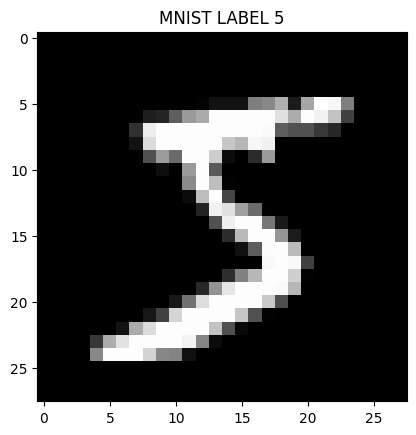

In [18]:
########################### 실   행 ###########################

# 0번째 이미지 시각화 (원본)
plt.figure()
plt.title("MNIST LABEL {}".format(label))
plt.imshow(image[0], cmap="gray")
plt.show()

###############################################################

### 5-3번
**[문제]** 아래의 `#### YOUR CODE ####` 부분을 모두 채워주세요. (7점)

In [19]:
import torch.nn.functional as F
# output_1 : max 풀링, 윈도우 크기 = 2
# output_2 : avg 풀링, 윈도우 크기 = 2
# output_3 : max 풀링, 윈도우 크기 = 3
# output_4 : avg 풀링, 윈도우 크기 = 3

max_pool_2 = F.max_pool2d
output_1 = max_pool_2(image, kernel_size=2)
print(output_1.size())

avg_pool_2 = F.avg_pool2d
output_2 = avg_pool_2(image, kernel_size=2)
print(output_2.size())

max_pool_3 = F.max_pool2d
output_3 = max_pool_3(image, kernel_size=3)
print(output_3.size())

avg_pool_3 = F.avg_pool2d
output_4 = avg_pool_3(image, kernel_size=3)
print(output_4.size())

torch.Size([1, 14, 14])
torch.Size([1, 14, 14])
torch.Size([1, 9, 9])
torch.Size([1, 9, 9])


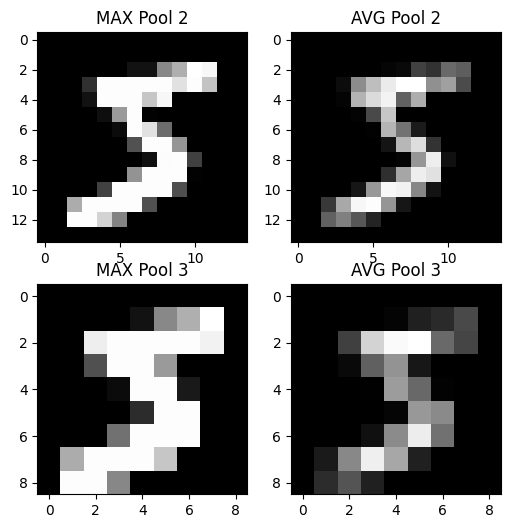

In [20]:
########################## 실행 ##########################

fig, axs = plt.subplots(2, 2, figsize=(6, 6)) # figsize는 적절히 조정 가능

# 첫 번째 이미지
axs[0, 0].imshow(output_1[0], cmap='gray')
axs[0, 0].title.set_text('MAX Pool 2')

# 두 번째 이미지
axs[0, 1].imshow(output_2[0], cmap='gray')
axs[0, 1].title.set_text('AVG Pool 2')

# 세 번째 이미지
axs[1, 0].imshow(output_3[0], cmap='gray')
axs[1, 0].title.set_text('MAX Pool 3')

# 네 번째 이미지
axs[1, 1].imshow(output_4[0], cmap='gray')
axs[1, 1].title.set_text('AVG Pool 3')

# 전체 그림을 보여줍니다.
plt.show()

##########################################################

### 5-4번
**[문제]** : 위 출력 결과를 보았을 때, Max Pooling과 Avg Pooling 중 어떤 방법을 취했을 때 더 숫자가 잘 인식되나요? 이유도 생각해 봅시다. (자유롭게 서술) (6점)

주관적으로 봤을 때 MAX POOL 3의 경우 너무 과하게 크고 MAX POOL 2가 가장 적당하다고 생각한다. AVG의 경우 모자이크 처럼 숫자가 흐려보인다.

### 6번. 손글씨 mnist 데이터 셋으로 실습해보기

아래 코드를 실행해주세요.(문제 X)

In [21]:
#라이브러리 호출

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [22]:
# mnist 데이터셋 내려받고 데이터 로더에 전달

train_dataset  = datasets.MNIST(root = 'dataset',  
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

test_dataset  = datasets.MNIST(root = 'dataset',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=100)

100%|██████████| 9912422/9912422 [00:01<00:00, 9663571.95it/s] 


Extracting dataset\MNIST\raw\train-images-idx3-ubyte.gz to dataset\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 7242358.83it/s]


Extracting dataset\MNIST\raw\train-labels-idx1-ubyte.gz to dataset\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 6693869.14it/s]


Extracting dataset\MNIST\raw\t10k-images-idx3-ubyte.gz to dataset\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4429325.45it/s]

Extracting dataset\MNIST\raw\t10k-labels-idx1-ubyte.gz to dataset\MNIST\raw



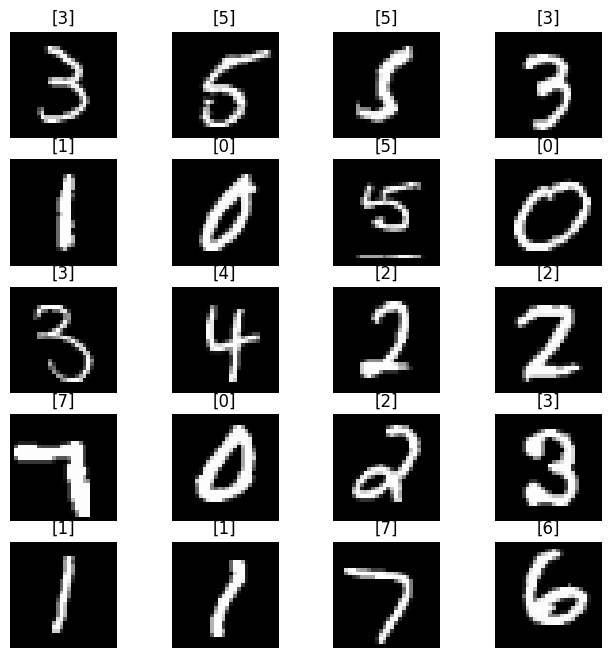

In [23]:
# 손글씨 데이터셋 시각화

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title([train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

### 6-1번

** 여기부터 문제입니다. <br/>
1) 각 layer의 입력 데이터 크기와 출력 크기를 고려하여 ????를 채워 CNNModel을 완성해주세요.(15점) <br/>
- 최종적으로는 숫자 10개를 나누는 분류를 수행하는 모델을 완성하고자 합니다.<br/>
- 마지막에 multi-class 분류를 위한 activation function으로는 log softmax 함수를 사용하고자 합니다.

In [28]:
# 합성곱 네트워크 생성

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv_layers = nn.Sequential (
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.1),
            nn.BatchNorm2d(32),            
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.1),
            nn.BatchNorm2d(64),            
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.1),
            nn.BatchNorm2d(128),            
            nn.MaxPool2d(2)
        ) 
        
        self.linear_layers = nn.Sequential ( 
            nn.Linear(28*4*4, 128), 
            nn.LeakyReLU(0.1),            
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.1),
            nn.BatchNorm1d(64), 
            nn.Linear(64, 10),
            nn.LogSoftmax(dim=-1)
        )        
            
    def forward(self, x):
        x = self.conv_layers(x) # Conv + Pool
        x = x.view(x.size(0), -1) # Flatten
        x = self.linear_layers(x) # Classification
        return x

### 6-2번

2. 합성곱 네트워크를 위한 파라미터를 정의하려고 합니다. ????를 채워주세요. (10점) <br/>
- 옵티마이저를 위한 경사 하강법으로는 Adam을 사용하고자 합니다.

In [29]:
# 합성곱 네트워크를 위한 파라미터 정의

learning_rate = 0.001;
model = CNNModel();
model.to(device)

criterion = nn.NLLLoss();
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
print(model)

CNNModel(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.1)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.1)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=2048, out_features=128, bias=True)

밑에 코드를 실행시켜 모델을 학습시키고, 성능을 확인해보세요.

In [30]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
    
        if not (count % 50):    
            total = 0
            correct = 0        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)            
                test = Variable(images.view(100, 1, 28, 28))            
                outputs = model(test)            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x1152 and 2048x128)

## 문제 7. AlexNet을 이용해서 CIFAR 10 이미지 데이터 분류하기 (80점)

#### (0) 데이터 전처리  
아래 코드를 실행해주세요

In [31]:
import torch 
import torchvision 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import CIFAR10

 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.cuda import is_available

device='cuda' if is_available() else 'cpu'

In [32]:
transform={
    'train':transforms.Compose([
                                transforms.Resize((256,256)),
                                transforms.RandomResizedCrop((227,227)),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ]),
    'test':transforms.Compose([
                               transforms.Resize((256,256)),
                               transforms.CenterCrop((227,227)), 
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ])
}


train_data=CIFAR10(root='.',train=True,transform=transform['test'],download=True)
test_data=CIFAR10(root='.',train=False,transform=transform['test'],download=True)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

100%|██████████| 170498071/170498071 [00:23<00:00, 7243693.66it/s]


Extracting .\cifar-10-python.tar.gz to .
Files already downloaded and verified


#### (1) AlexNet 모델 구축 (50점)  

다음 조건에 맞게 AlexNet 모델을 구축하는 코드를 완성해주세요.  
- Response-normalization layer는 1번째와 2번째 conv layer 뒤에 위치한다.  
- Max-pooling layer는 1,2,5번째 conv layer뒤에 위치한다.   
- ReLU는 모든 conv layer와 fc layer뒤에 위치한다. 
- 처음 두 fc layer뒤에 dropout을 적용한다.  
- 각각의 Conv, FC layer는 다음과 같다.  
    1. Conv layer1: 224x224x3의 입력 이미지를 11x11x3 크기의 stride가 4인 96개의 커널로 출력한다.  
    2. Conv layer2: conv layer1의 출력을 response-normalize, pooling을 거치고 5x5x48 크기의 256개의 커널로 출력한다.  
    3. Conv layer3: conv layer2의 출력을 response-normalize, pooling을 거치고 3x3x256 크기의 384개의 커널로 출력한다.  
    4. Conv layer4: conv layer3의 출력을 3x3x192 크기의 384개의 커널로 출력한다.  
    5. Conv layer5: conv layer4의 출력을 3x3x192 크기의 256개의 커널로 출력한다.  
    6. FC layer1: conv layer5의 출력을 pooling을 거치고 4096개로 출력한다.   
    7. FC layer2: fc layer1의 출력을 4096개로 출력한다.  
    8. FC layer3: fc layer2의 출력을 1000개로 출력한다.


In [37]:
class AlexNet(nn.Module):
    def __init__(self,num_classes=1000):
        super(AlexNet,self).__init__()
        self.net=nn.Sequential(
        
            nn.Conv2d(3,96,kernel_size=11, stride=4, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(96,256,kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LocalResponseNorm(5,alpha=0.0001, beta=0.75),
            nn.Conv2d(256,384,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(384,384,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=2),            
        )
        self.fc=nn.Sequential(
            
            nn.Linear(256*6*6, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(0.5),  
            nn.Linear(4096,num_classes)
        )

    def forward(self,x):
        x=self.net(x)
        x=torch.flatten(x,1)
        x=self.fc(x)
        return x

#### (2) 손실함수 및 최적화방법 정의 (5점)  
- cross entropy 손실함수 사용  
- SGD optimizer 사용 ( lr=0.01, momentum=0.9, weight_decay=0.0005로 설정 )

In [38]:
import torch.optim as optim
model = AlexNet(num_classes=10)

# 손실함수 정의
criterion = nn.CrossEntropyLoss()

# optimizer 정의
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)

model=model.to(device)
criterion=criterion.to(device)

#### (3) 모델 학습 (15점)  
colab에서 GPU / TPU 사용하면 조금 더 빠르게 실행 가능합니다 ｡ ｡

In [40]:
loss_ =[]
 
n = len(trainloader) #배치 개수 
 
for epoch in range(50):
    running_loss = 0.0
    for data in trainloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # gradient를 0으로 초기화
        optimizer.zero_grad()
        
        # 예측값 산출
        outputs = model(inputs)
        
        # 손실함수 계산
        loss = criterion(outputs,labels)
        
        # 손실함수 기준으로 역전파
        loss.backward()
        
        # 가중치 최적화
        optimizer.step()
        
        running_loss += loss.item()
        
    loss_.append(running_loss / n)
    print('[%d] loss: %.3f' %(epoch +1, running_loss / len(trainloader)))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x13824 and 9216x4096)

#### (4) 모델 평가 (10점)

In [43]:
correct = 0
total = 0
with torch.no_grad():
    model.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # 개수 누적(총 개수)
        total += labels.size(0)
        # 누적(맞으면 1, 틀리면 0으로 합산)
        correct += (predicted == labels).sum().item() 
        
print('Test accuracy: %.2f %%' % (100 * correct / total))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x13824 and 9216x4096)

## 문제 8. ResNet (20점)

#### (1) 빈칸을 채워주세요.  (5점)
(a) Deep Residual Learning for Image Recognition 논문에서는 (잔차) 를 학습에 사용하는 것으로 레이어를 재구성한다.  
(b) (Degradation problem) 은 네트워크가 깊어질수록 성능이 저하되는 문제이다.  
(c) (Deep residual learing framework) 은 입력을 네트워크의 여러 층을 건너뛰어 출력층 근처에 직접 더해주는 구조이다.

답 :  잔차, Degradation problem, Deep residual learing framework

#### (2) ResNet 코드 구현  (15점)
다음은 ResNet 네트워크를 구성하는 기본블록과 병목블록을 정의한 코드입니다.  
기본블록과 병목블록의 구조적, 기능적 차이를 설명해주세요.  
(힌트 : 기본블록을 병목블록으로 변경하면 계층을 더 깊게 쌓으면서 계산에 대한 비용을 줄일 수 있습니다.)

In [44]:
#기본블록 정의
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=False):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False) 
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
 
        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None
        self.downsample = downsample

    def forward(self, x):
        i = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += I 
        x = self.relu(x)

        return x

In [45]:
#병목 블록 정의
class Bottleneck(nn.Module):
    expansion = 4 

    def __init__(self, in_channels, out_channels, stride=1, downsample=False):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False) 
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, self.expansion*out_channels, kernel_size=1, stride=1, bias=False) 
        self.bn3 = nn.BatchNorm2d(self.expansion*out_channels)
        self.relu = nn.ReLU(inplace=True)

        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion*out_channels, kernel_size=1, stride=stride, bias=False)
            bn = nn.BatchNorm2d(self.expansion*out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None
            self.downsample = downsample

    def forward(self, x):
        i = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)
        return x

답 : 구조적 차이는 컨볼루션 레이어가 3x3 2개인지, 1x1과 3x3으로 이루어졌는지의 차이가 있다. 기능적 차이는 기본 블록은 단일 크기의 특성 맵을 처리하고, 병목 블록은 특성 맵을 낮은 차원으로 압축하여 더 깊은 특성을 학습한다.